# **Capstone Project- Gold Price Prediction**

  This project focuses on predicting the price of gold. It utilizes historical data and various features to train the model and make predictions on future gold prices.



##**Introduction**
Gold is a widely traded precious metal with prices influenced by various economic, political, and market factors. Predicting the price of gold can be valuable for investors, traders and financial analysts. In this project, we aim to build a perdictive the gold prices based on historical data.

#**Import Libraries**


In [67]:
import numpy as np  #Linear algebra
import pandas as pd  #data processing, CSV  file I/O (e.g pd.read_csv)
import matplotlib.pyplot as plt  #plotting graphs and charts
import seaborn as sns  #drawing staistical graphics
from sklearn.model_selection import train_test_split #import package  for splitting data set
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics # Import metrics package from sklearn for statistical analysis


#**Data Collection**




In [68]:
# loading the csv data to a pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

###**Data overview:**
 This data file is a Comma separated value file format  with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX, GLD, USO, SLV, EUR/USD against the dates in the date column.
###**Data Dictionary:**
* Date - mm/dd/yyyy
* SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.
* GLD - Gold Price
* USO - United States Oil Fund-Not  Sure of UOM
* SLV - Silver Price
* EUR/USD - currency pair quotation of the Euro against the USD






In [5]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#Display features in data set
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

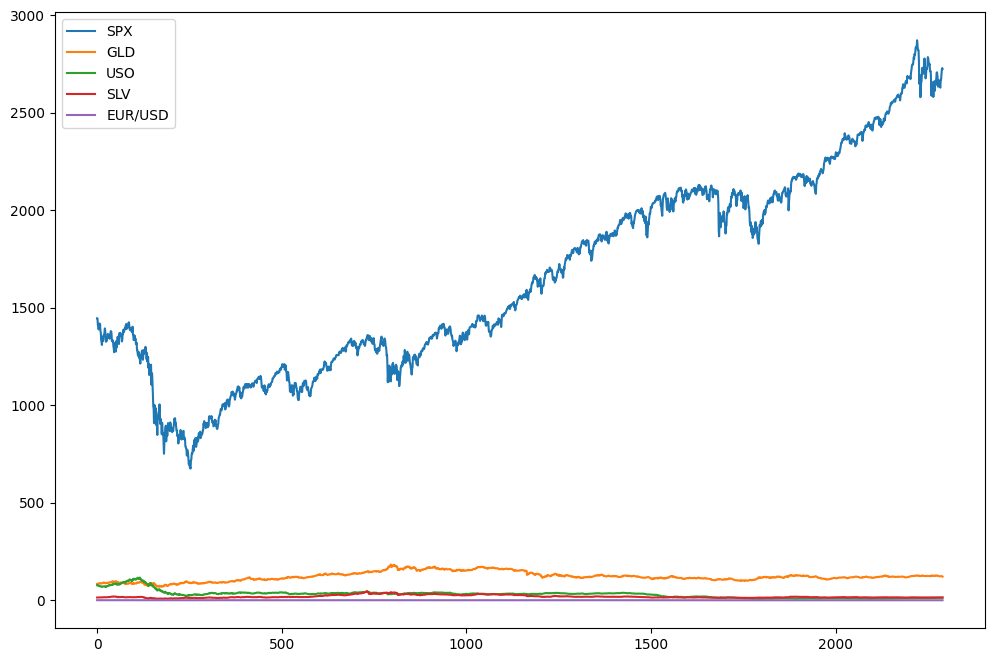

In [12]:
#Import package for data plots
plt.rcParams['figure.figsize']= [12,8]
gold_data.plot()
plt.show

In [13]:
gold_data.mean()

<ipython-input-13-37a9bc9210d2>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gold_data.mean()


SPX        1654.315776
GLD         122.732875
USO          31.842221
SLV          20.084997
EUR/USD       1.283653
dtype: float64

we will not use the colum of the date  because our data does not depend on it.

#**Visualization Analysis**

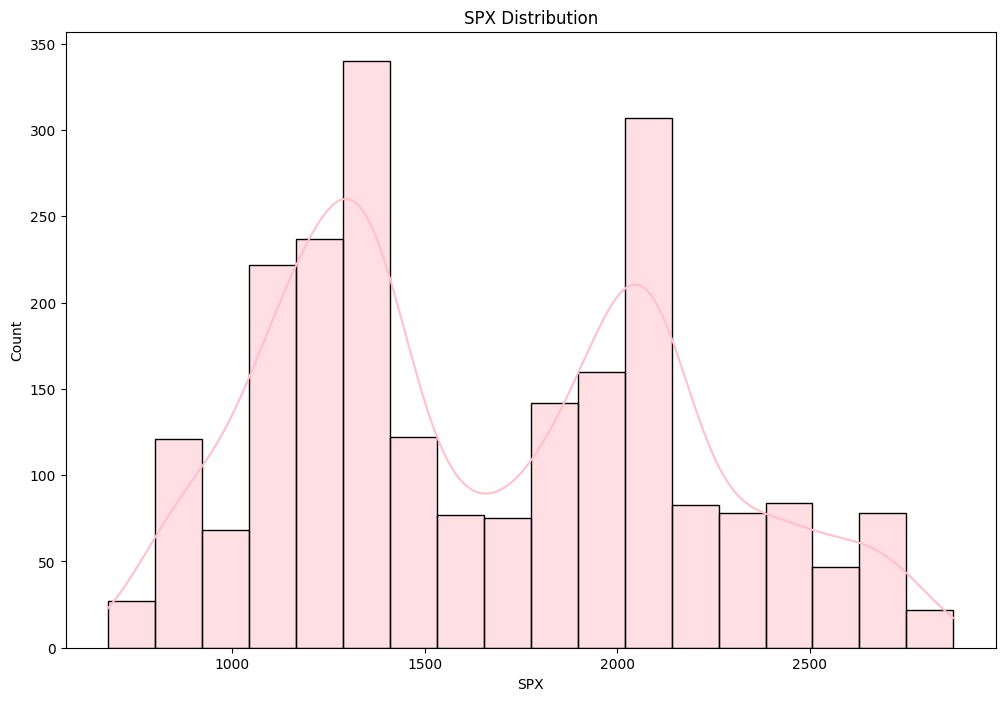

In [14]:
 #distribution of SPX
plt.title("SPX Distribution")
sns.histplot(data=gold_data, x='SPX', kde=True, color='pink')
plt.show()


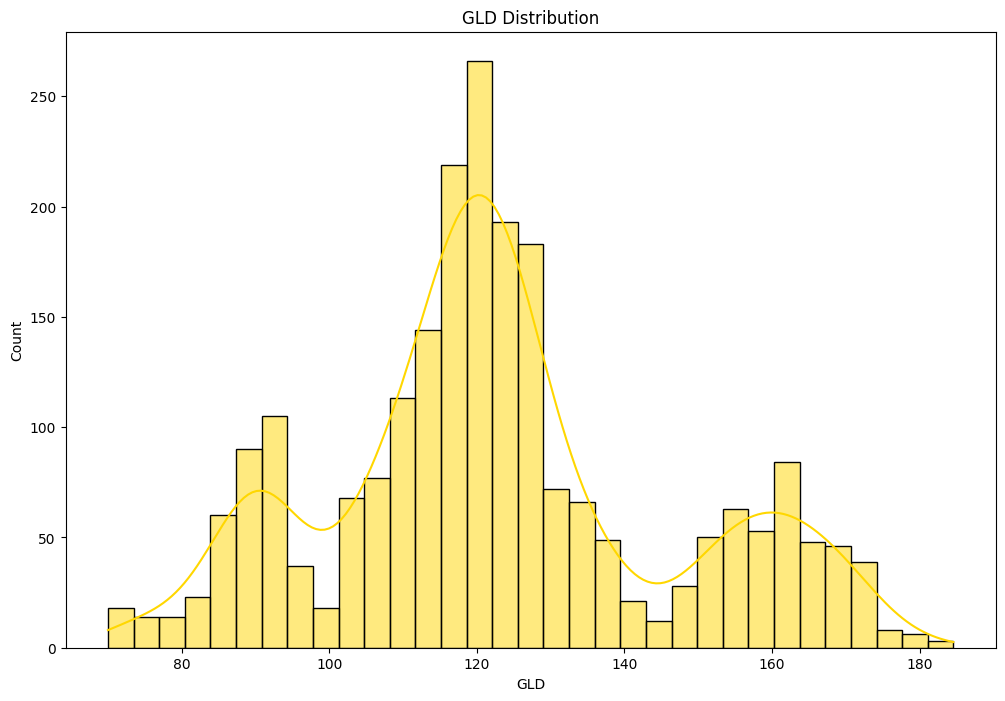

In [15]:
# distribution of GLD
plt.title("GLD Distribution")
sns.histplot(data=gold_data, x='GLD', kde=True, color='gold')
plt.show()

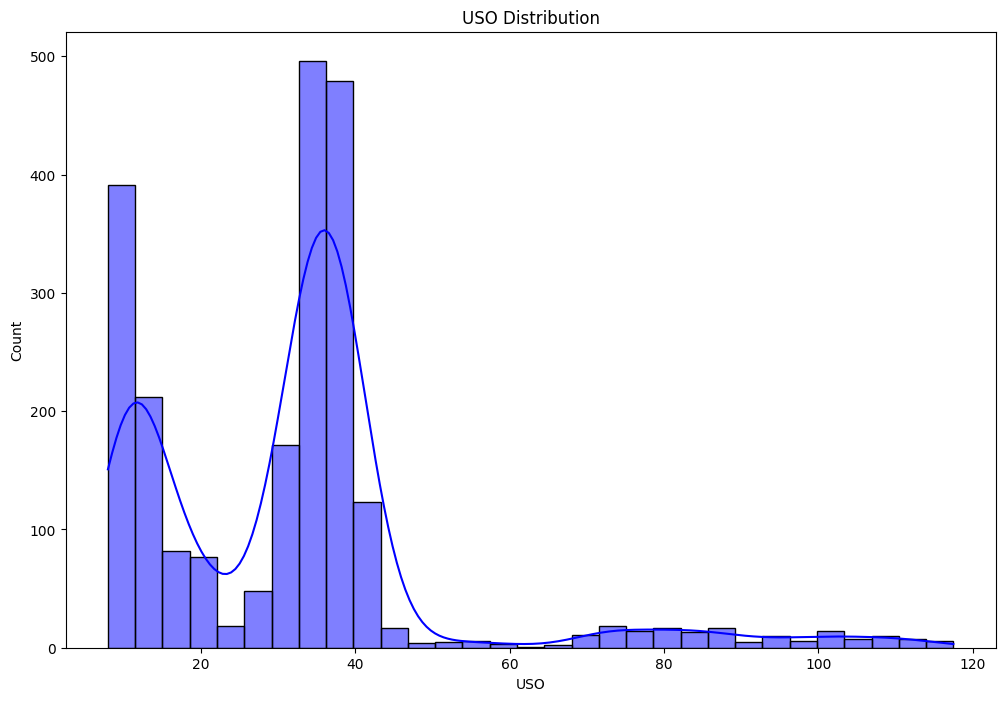

In [16]:
# distribution of USO
plt.title("USO Distribution")
sns.histplot(data=gold_data, x='USO', kde=True, color='blue')
plt.show()

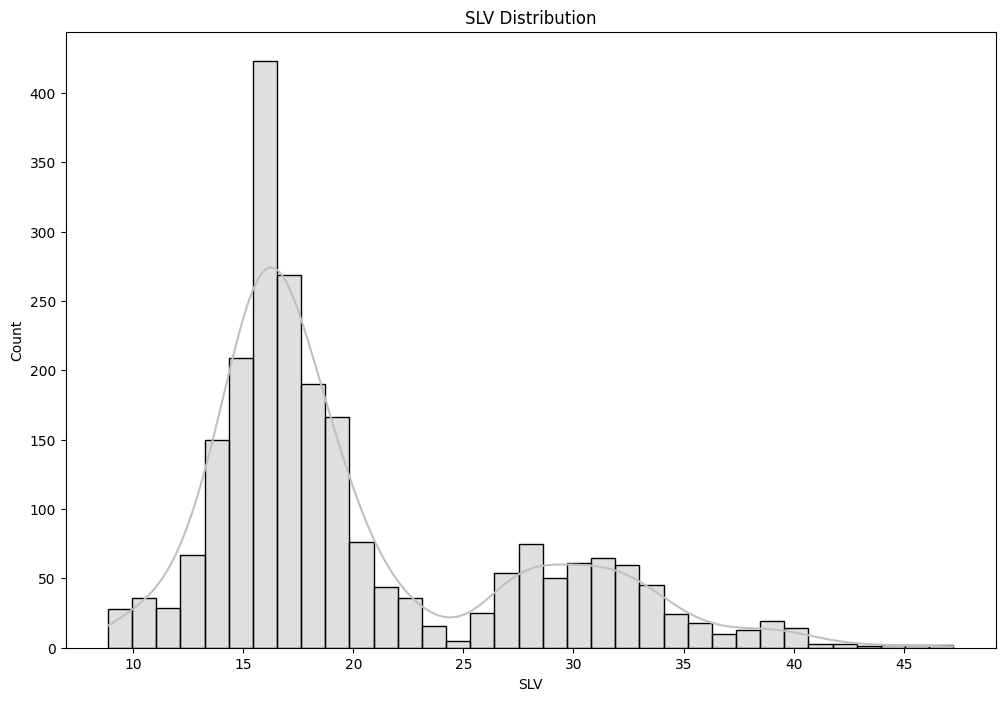

In [17]:
# distribution of SLV
plt.title("SLV Distribution")
sns.histplot(data=gold_data, x='SLV', kde=True, color='silver')
plt.show()

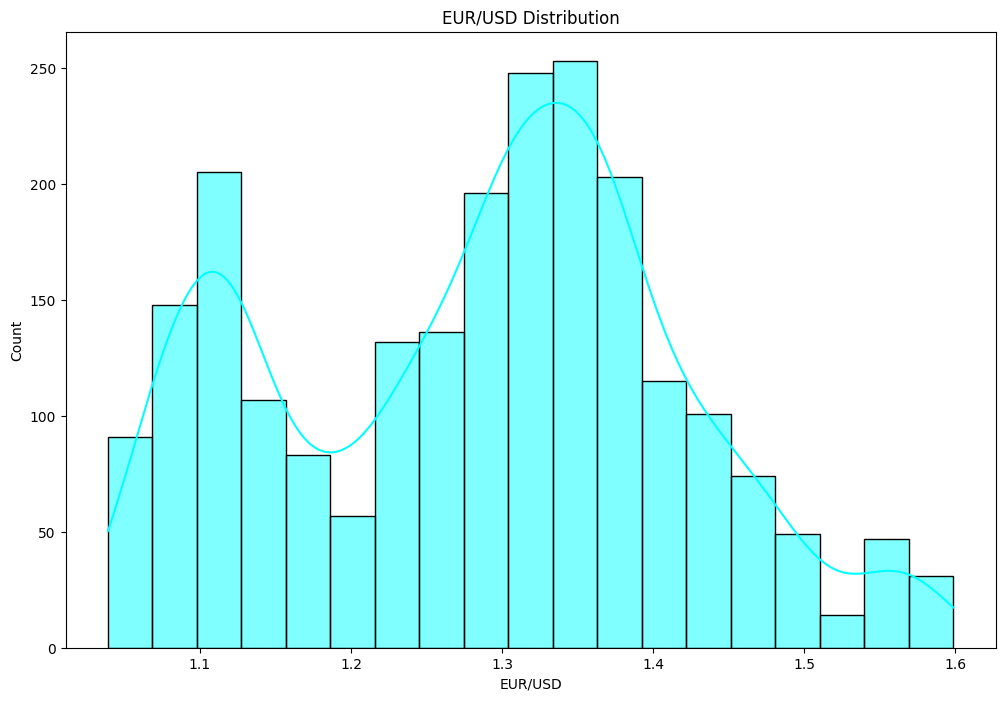

In [18]:
# distribution of EUR/USD
plt.title("EUR/USD Distribution")
sns.histplot(data=gold_data, x='EUR/USD', kde=True, color='cyan')
plt.show()

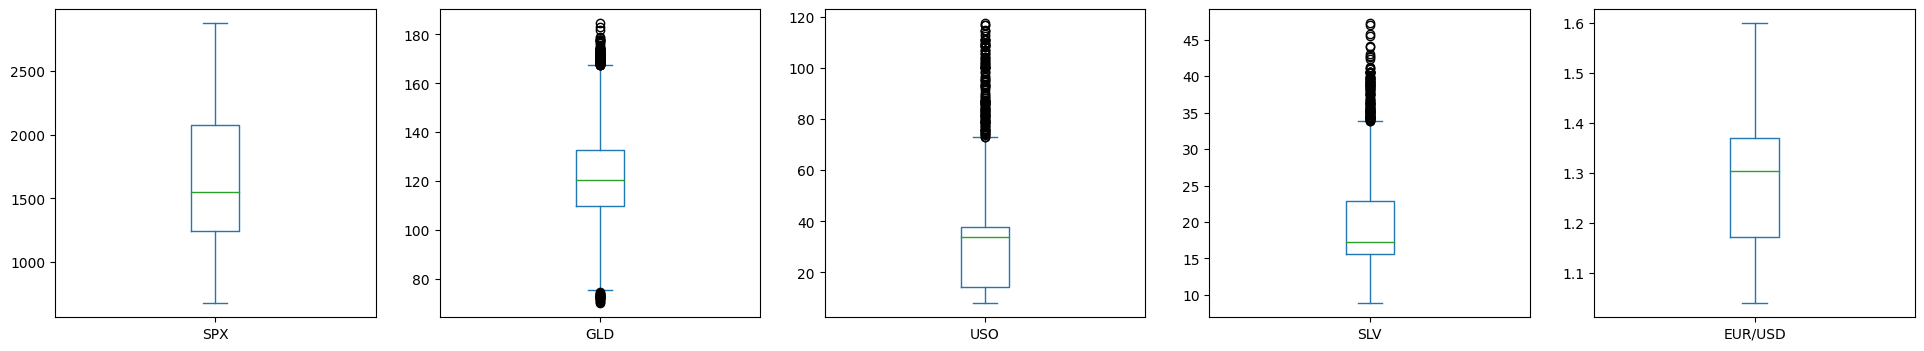

In [19]:
gold_data.plot(kind="box", subplots=True, layout=(1,5), figsize=(24,4),sharex=False, sharey=False);

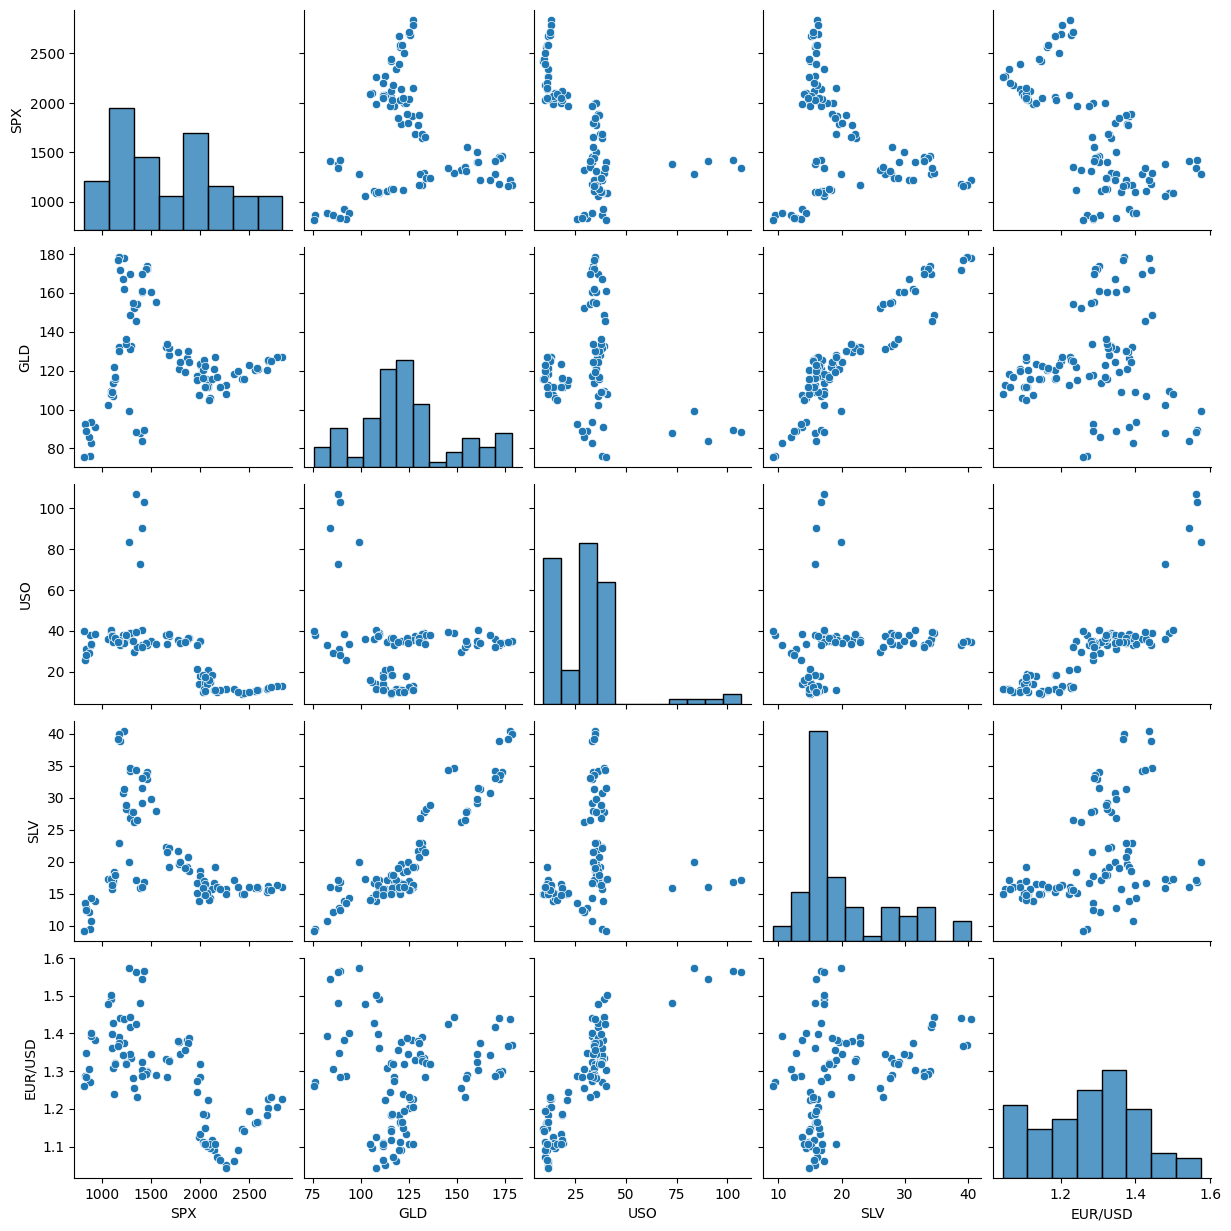

In [20]:
sns.pairplot(gold_data.sample(n=100));

##**Correlations:**
Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.

1. **Positive correlation**
Two features (variables) can be positively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) also increases.


2. **Negative correlation**
Two features (variables) can be negatively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) decreases.

In [21]:
correlation = gold_data.corr()

<ipython-input-21-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

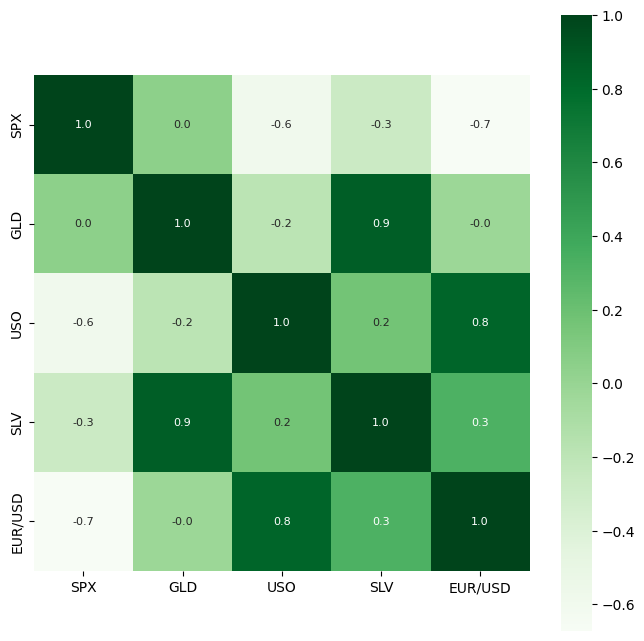

In [22]:
#constructing a heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [23]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


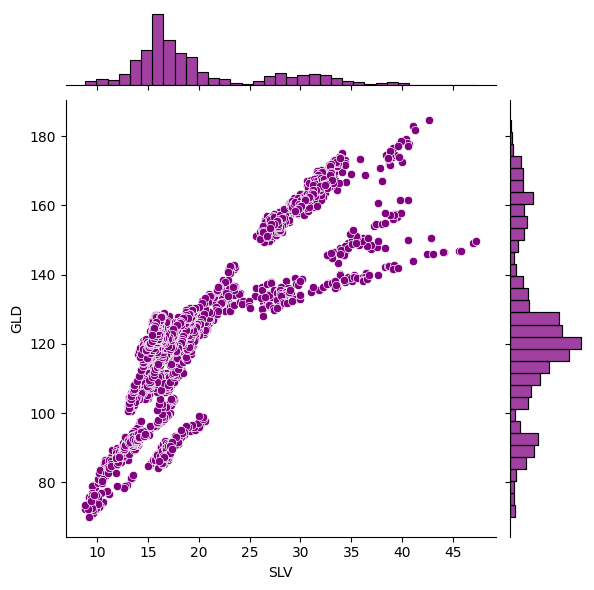

In [24]:
#Now we check the relation with GLD variable
sns.jointplot(x =gold_data['SLV'], y = gold_data['GLD'], color = 'purple')

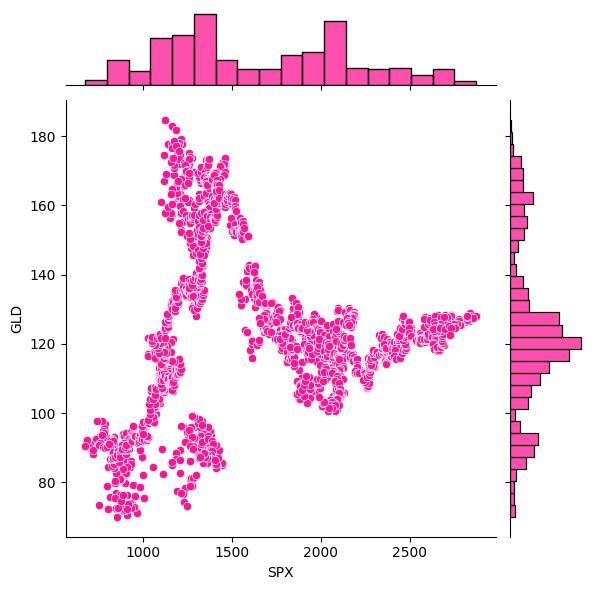

In [25]:
#Now we check the relation with GLD variable
sns.jointplot(x =gold_data['SPX'], y = gold_data['GLD'], color = 'deeppink')

#**Splitting the Features and Targets**

In [26]:
#discard the gold and use the rest values as features
x= gold_data.drop(['Date','GLD'], axis=1)

#use the gold as the target
y= gold_data['GLD']

In [27]:
#The features (input)
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
#The target
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


##**Splitting into Training Data and Testing Data**





In [29]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [69]:
# Split data into train and test set: 80% / 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [76]:
regressor = RandomForestRegressor(n_estimators=100)

In [77]:
#training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

#**Model Evaluation**

In [78]:
#Prediction on test data
y_pred = regressor.predict(x_test)

In [71]:
print(y_pred)

[168.69599891  82.05309988 115.90200009 127.6901007  120.80090133
 154.79789748 150.13879847 126.33829991 117.59259858 125.92800072
 116.39080103 171.60300029 141.57979849 167.84219903 115.16419986
 117.93230034 139.53200289 170.01690038 160.00110358 159.66920003
 155.19750041 125.01630008 176.33859978 157.29470356 125.19350036
  93.63379954  77.1694002  120.63629996 119.08589936 167.51610017
  88.18230005 125.12149995  91.07660077 117.6865001  121.11149962
 136.62340031 115.39970138 115.63110096 147.92310002 106.83890095
 104.4091022   87.19609797 126.40510053 118.01150016 154.12639929
 119.45340014 108.3382997  108.10589839  92.93310036 127.24439758
  75.43160005 113.56589891 121.37990021 111.28319937 118.86609891
 120.76259936 159.12729991 166.56910092 146.77739665  85.7541987
  94.2046005   86.87949858  90.50839982 119.06960082 126.3598005
 127.58209993 170.52109981 122.31099942 117.33149907  98.46920049
 168.49290088 142.69539819 132.34180192 121.13410206 121.37939955
 119.6520007

In [80]:
y_test = np.array(y_test)

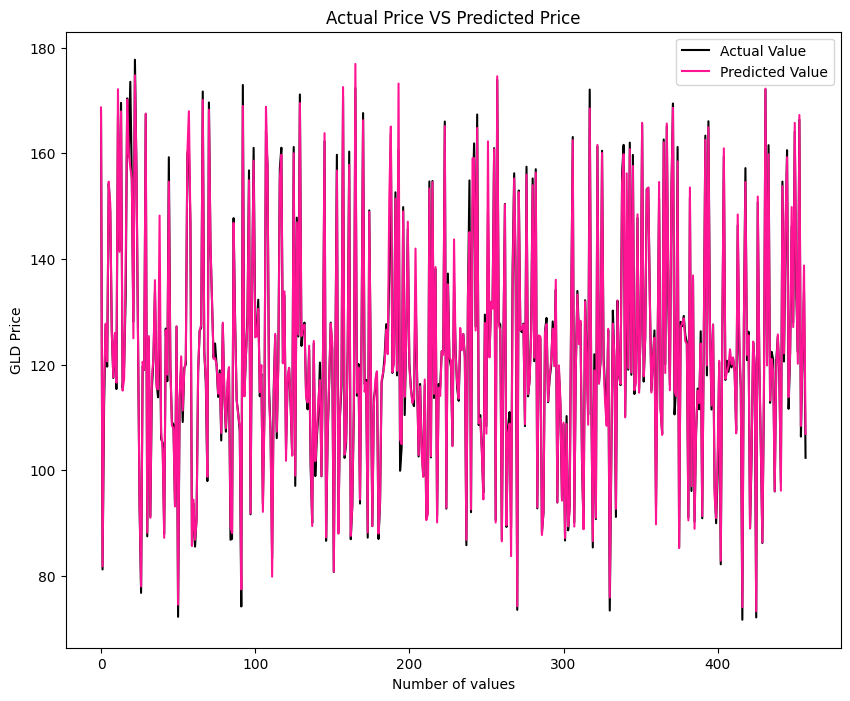

In [81]:
plt.rcParams['figure.figsize']=[10,8]
plt.plot(y_test, color='k', label='Actual Value')
plt.plot(y_pred, color='Deeppink', label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [74]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.998411358502509
0.9888580442596244


#**Error Evaluation Metrics**


1.**Mean Absolute Error(MAE):**
MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

2.**Mean Squared Error(MSE):**
Mean squared error states that finding the squared difference between actual and predicted value.

3.**Root Mean Squared Error(RMSE):**
 RMSE is clear by the name itself, that it is a simple square root of mean squared error.








In [58]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [59]:
gold_data['GLD'].describe()

count    2290.000000
mean      122.732875
std        23.283346
min        70.000000
25%       109.725000
50%       120.580002
75%       132.840004
max       184.589996
Name: GLD, dtype: float64

In [60]:
#Print the values of MAE, MSE, RMAE
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.3406296901310029
MSE :   5.876752139831171
RMAE :   2.424201340613269


#**R-Squared Error**

It measures the average squared difference between the predicted values and the actual values, quantifying the discrepancy between the model's predictions and the true observations.

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf=RandomForestRegressor().fit(x_train, y_train)
y_rf= rf.predict(x_test)
rf_score = metrics.r2_score(y_test, y_pred)
print("RandomForestRegressor : ", rf_score)

RandomForestRegressor :  0.9888580442596244


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr= LinearRegression().fit(x_train, y_train)
y_lr = lr.predict(x_test)
lr_score = metrics.r2_score(y_test, y_lr)
print("Linear Regression: ", lr_score)

Linear Regression:  0.8657886565869237


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt = DecisionTreeRegressor().fit(x_train, y_train)
y_dt = dt.predict(x_test)
dt_score = metrics.r2_score(y_test, y_dt)
print("Decision Tree: ", dt_score)

Decision Tree:  0.9835583712653053


#**Results**
The projects aims to provide accurate predictions of gold prices. The preformance of the model can be evaluated using appropriate evaluation metrics such as mean squared error(MSE), root mean squared error(RMSE), and R-Squared.


The results of the predictions can be visualized using graphs, charts or other relevent visual represention.